In [6]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd
import seaborn as sns

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Modeling modules

from xgboost.sklearn import XGBClassifier


# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Model evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# for Plotting
import matplotlib.pyplot as plt
from xgboost import plot_importance
%matplotlib inline

# Needed for Cross-validation in Bayes optimization

from sklearn.model_selection import cross_val_score

# Bayesian Optimization
from bayes_opt import BayesianOptimization


# Find feature importance of ANY BLACK BOX estimator

import eli5
from eli5.sklearn import PermutationImportance


# Misc
import time
import os
import gc
import random
from scipy.stats import uniform

In [7]:
# Set option to dislay many rows
pd.set_option('display.max_columns', 100)

In [8]:
# Read the data to be analysed

In [9]:
#Read Dataset and check for any missing variables across columns
data = pd.read_csv("../input/winequalityN.csv")

In [10]:
# Know the shape
data.shape

(6497, 13)

In [11]:
# list of column names (attributes)
data.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [12]:
data.dtypes.value_counts()

float64    11
object      1
int64       1
dtype: int64

In [13]:
data.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [14]:
# statistical summary of numerical attributes
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
## Look for and drop rows that contain null values
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
data.shape

(6463, 13)

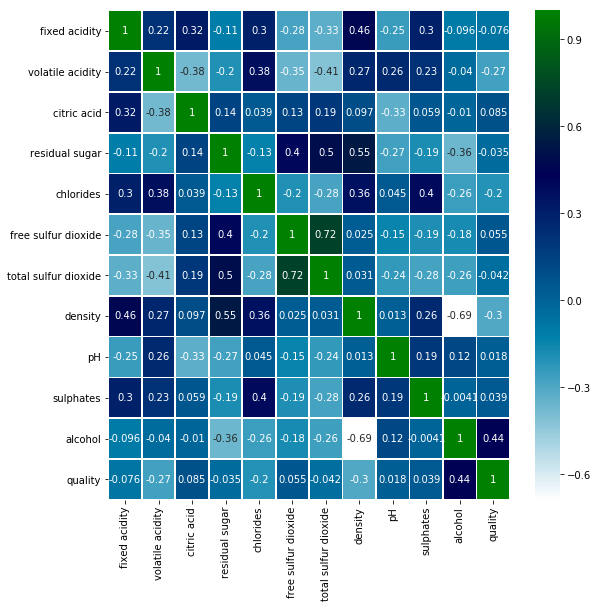

In [19]:
# Visualize the Data for what it is, to look for possible correlation among attributes
# and with wine type (Target)

plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(),linewidths=0.6,annot=True,cmap='ocean_r',cbar=True)

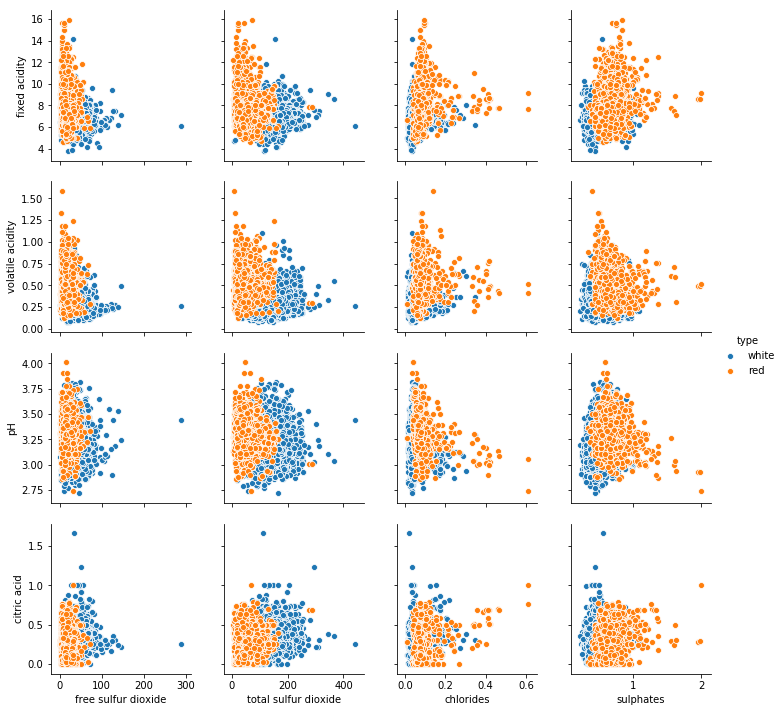

In [20]:
# Looking at above Correlation matrix, one can see the Positive, Negative or the lack of correlation among attributes.
# Out of 12*12 matrix above, below is only a subset corelation pair plot (for better visibility) showing the
# correlation between the chemicals vs Acidity

sns.pairplot(data,hue = 'type',x_vars = ['free sulfur dioxide','total sulfur dioxide','chlorides','sulphates'],y_vars = ['fixed acidity','volatile acidity','pH','citric acid'])

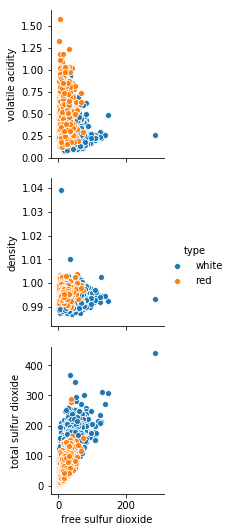

In [21]:
# From the Correlation Matrix, "free sulfur dioxide" is a good example for statistical representation of 
# +ve Correlation (with total sulfur dioxide)
# no correlation (with density)
# -ve correlation (with volatile acidity)
sns.pairplot(data,hue = 'type',x_vars = ['free sulfur dioxide'],y_vars = ['volatile acidity','density','total sulfur dioxide'])

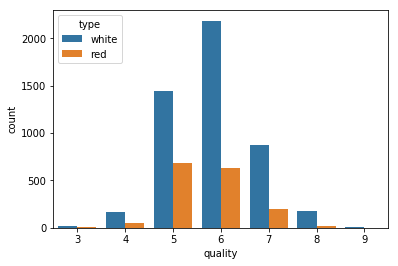

In [22]:
# Countplot for Wine quality for both types
sns.countplot(x = data['quality'], data=data, hue='type')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


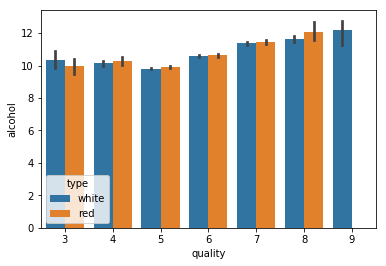

In [23]:
# Barplot for quality vs alcohol
sns.barplot(x='quality', y = 'alcohol', hue = 'type' , data = data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


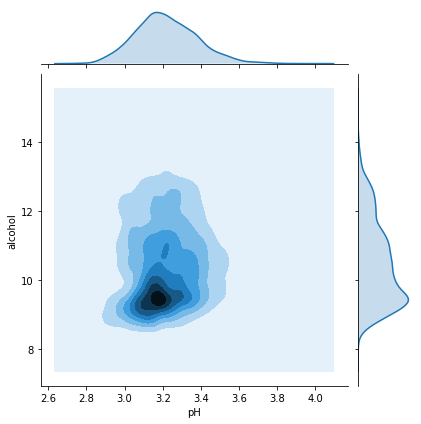

In [24]:
# pH value across both wine types vs Alcohol levels. Well concentrated as expected.
sns.jointplot(x='pH', y = 'alcohol',kind='kde',data = data)

In [25]:
###Seperating explanatory(X) and target(y) variables from the dataset, 
##and perform test/train
X = data.iloc[ :, 1:13]
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [26]:
y = data.iloc[ : , 0]
y.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

In [27]:
#y = y.map({'white' :1, 'red' : 0})
y = y.map({'white':1, 'red' : 0})
y.dtype
y.head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [28]:
##store column names of X to be used for feature importance
colnames = X.columns.tolist()

In [29]:
### Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True
                                                    )

In [30]:
X_train.shape

(4200, 12)

In [31]:
X_test.shape

(2263, 12)

In [32]:
y_train.shape

(4200,)

In [33]:
y_test.shape

(2263,)

In [34]:
#### Pipe using XGBoost

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]

# 5.1  Instantiate Pipeline object
pipe_xg = Pipeline(steps_xg)

In [35]:
##################### Grid Search #################

parameters = {'xg__learning_rate':  [0, 1],  
              'xg__n_estimators':   [50,  100],
              'xg__max_depth':      [3,5],
              'pca__n_components' : [5,7]
              } 

In [36]:
#    Create Grid Search object first with all necessary Specs

clf = GridSearchCV(pipe_xg,
                   parameters,
                   n_jobs = 2,
                   cv =2 ,
                   verbose =2,
                   scoring = ['accuracy', 'roc_auc'],
                   refit = 'roc_auc'
                   )

In [37]:
# 7.2. Start fitting data to pipeline
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
(end - start)/60 

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:    8.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.13874831994374592

In [38]:
f"Best score: {clf.best_score_} "

'Best score: 0.9946135617274385 '

In [39]:
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 7, 'xg__learning_rate': 1, 'xg__max_depth': 5, 'xg__n_estimators': 50}"

In [40]:
#####Instantiate##########
perm_grid = PermutationImportance(
                            clf,
                            random_state=1
                            )

In [41]:
# fit data & learn

start = time.time()
perm_grid.fit(X_test, y_test)
end = time.time()
(end - start)/60

0.006366999944051107

In [42]:
## Get feature weights
eli5.show_weights(
                  perm_grid,
                  feature_names = colnames
                  )

Weight,Feature
0.0184 ± 0.0023,total sulfur dioxide
0.0127 ± 0.0053,volatile acidity
0.0095 ± 0.0026,chlorides
0.0076 ± 0.0032,sulphates
0.0056 ± 0.0029,free sulfur dioxide
0.0054 ± 0.0023,pH
0.0029 ± 0.0016,density
0.0020 ± 0.0017,fixed acidity
0.0020 ± 0.0014,residual sugar
0.0018 ± 0.0019,quality


In [43]:
fw_grid = eli5.explain_weights_df(
                  perm_grid,
                  feature_names = colnames
                  )

In [44]:
# Print importance
fw_grid

,feature,weight,std
0,total sulfur dioxide,0.018436,0.001159
1,volatile acidity,0.012651,0.002669
2,chlorides,0.009487,0.001305
3,sulphates,0.007617,0.001597
4,free sulfur dioxide,0.005613,0.001468
5,pH,0.005365,0.001172
6,density,0.002879,0.000779
7,fixed acidity,0.002047,0.000867
8,residual sugar,0.002037,0.000704
9,quality,0.001808,0.000942


In [45]:
##################### Randomized Search parameter tuning #################

parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,100),
              'xg__max_depth':      range(3,5),
              'pca__n_components' : range(5,7)}

In [46]:
# Tune parameters using random search

rs = RandomizedSearchCV(pipe_xg,
                        param_distributions=parameters,
                        scoring= ['roc_auc', 'accuracy'],
                        n_iter=10,
                        verbose = 3,
                        refit = 'roc_auc',
                        n_jobs = 2,
                        cv = 2
                        )

In [47]:
## fit data and learn
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    2.9s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.052329087257385255

In [48]:
 ## Instantiate the importance object
perm_random = PermutationImportance(
                            rs,
                            random_state=1
                            )

In [49]:
#fit data & learn

start = time.time()
perm_random.fit(X_test, y_test)
end = time.time()
(end - start)/60

0.006947847207387289

In [50]:
# Get feature weights
eli5.show_weights(
                  perm_random,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

Weight,Feature
0.0109 ± 0.0035,volatile acidity
0.0104 ± 0.0015,total sulfur dioxide
0.0103 ± 0.0022,sulphates
0.0058 ± 0.0035,pH
0.0035 ± 0.0013,density
0.0032 ± 0.0009,chlorides
0.0025 ± 0.0027,free sulfur dioxide
0.0023 ± 0.0018,fixed acidity
0.0023 ± 0.0021,residual sugar
0.0018 ± 0.0007,citric acid


In [51]:
fw_random = eli5.explain_weights_df(
                  perm_random,
                  feature_names = colnames      # X_test.columns.tolist()
                  )

In [52]:
# Print importance
fw_random

,feature,weight,std
0,volatile acidity,0.010939,0.001748
1,total sulfur dioxide,0.010413,0.000727
2,sulphates,0.010289,0.001082
3,pH,0.005757,0.001769
4,density,0.003510,0.000668
5,chlorides,0.003180,0.000462
6,free sulfur dioxide,0.002524,0.001346
7,fixed acidity,0.002346,0.000906
8,residual sugar,0.002314,0.001050
9,citric acid,0.001755,0.000370


In [53]:
#####################   Bayesian  Optimization parameter tuning ###### 
para_set = {
           'learning_rate':  (0, 1),
           'n_estimators':   (50,100),
           'max_depth':      (3,5),
           'n_components' :  (5,7)
            }

In [54]:
# Create a function that when passed some parameters
#    evaluates results using cross-validation
#    This function is used by BayesianOptimization() object

def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    # passing parameters to make pipeline
    pipe_xg1 = make_pipeline (ss(),                        # Why repeat this here for each evaluation?
                              PCA(n_components=int(round(n_components))),
                              XGBClassifier(
                                           silent = False,
                                           n_jobs=2,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                             )

    # fit the pipeline and evaluate
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train,
                                y = y_train,
                                cv = 4,
                                n_jobs = 2,
                                scoring = 'f1'
                                ).mean()             # take the average of all results


    # return maximum/average value of result
    return cv_result

In [55]:
xgBO = BayesianOptimization(
                             xg_eval,
                             para_set
                             )

In [56]:
start = time.time()
xgBO.maximize(init_points=5, 
               n_iter=5,
               )
end = time.time()
(end-start)/60

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9946   |  0.5845   |  3.131    |  6.983    |  86.69    |
|  2        |  0.9911   |  0.05235  |  4.925    |  5.584    |  66.79    |
|  3        |  0.9922   |  0.8687   |  4.663    |  6.415    |  97.5     |
|  4        |  0.9949   |  0.2945   |  4.141    |  6.903    |  74.7     |
|  5        |  0.9943   |  0.5874   |  4.908    |  6.746    |  58.52    |
|  6        |  0.9943   |  0.6084   |  3.309    |  6.892    |  50.0     |
|  7        |  0.9943   |  0.8364   |  3.078    |  6.996    |  50.01    |
|  8        |  0.9937   |  0.9503   |  3.102    |  6.674    |  50.01    |
|  9        |  0.993    |  0.7585   |  3.331    |  5.078    |  100.0    |
|  10       |  0.9938   |  0.7307   |  3.022    |  6.683    |  50.01    |


0.7639601270357768

In [57]:
xgBO.res

[{'target': 0.9946116141667432,
  'params': {'learning_rate': 0.5845424871619145,
   'max_depth': 3.130830301961377,
   'n_components': 6.982542466426741,
   'n_estimators': 86.69195268755905}},
 {'target': 0.9911159337564194,
  'params': {'learning_rate': 0.052352482529957056,
   'max_depth': 4.924919625953693,
   'n_components': 5.583692438952866,
   'n_estimators': 66.78643212786469}},
 {'target': 0.9922272282639921,
  'params': {'learning_rate': 0.8686996210093092,
   'max_depth': 4.663405449466766,
   'n_components': 6.414907332408287,
   'n_estimators': 97.50208508940446}},
 {'target': 0.9949268640726705,
  'params': {'learning_rate': 0.2945154794243541,
   'max_depth': 4.1408430782044094,
   'n_components': 6.902972727179323,
   'n_estimators': 74.7034784795598}},
 {'target': 0.994293336773292,
  'params': {'learning_rate': 0.5874370601651839,
   'max_depth': 4.907746331245259,
   'n_components': 6.746294309408109,
   'n_estimators': 58.52368964383537}},
 {'target': 0.9942937477

In [58]:
#Get values of parameters that maximise the objective
xgBO.max

{'target': 0.9949268640726705,
 'params': {'learning_rate': 0.2945154794243541,
  'max_depth': 4.1408430782044094,
  'n_components': 6.902972727179323,
  'n_estimators': 74.7034784795598}}

In [59]:
############### Fitting the best parameters in our model ##############

# Model with best parameters of grid search
model_gs = XGBClassifier(
                    learning_rate = clf.best_params_['xg__learning_rate'],
                    max_depth = clf.best_params_['xg__max_depth'],
                    n_estimators=clf.best_params_['xg__max_depth']
                    )

# Model with best parameters of random search
model_rs = XGBClassifier(
                    learning_rate = rs.best_params_['xg__learning_rate'],
                    max_depth = rs.best_params_['xg__max_depth'],
                    n_estimators=rs.best_params_['xg__max_depth']
                    )

# Model with best parameters of Bayesian Optimization
model_bo = XGBClassifier(
                    learning_rate = xgBO.max['params']['learning_rate'],
                    max_depth = int(xgBO.max['params']['max_depth']),
                    n_estimators= int(xgBO.max['params']['n_estimators'])
                    )

In [60]:
# fitting with all 3 models
start = time.time()
model_gs.fit(X_train, y_train)
model_rs.fit(X_train, y_train)
model_bo.fit(X_train, y_train)
end = time.time()
(end - start)/60

0.0056544065475463865

In [61]:
# Predictions with all 3 models
y_pred_gs = model_gs.predict(X_test)
y_pred_rs = model_rs.predict(X_test)
y_pred_bo = model_bo.predict(X_test)

In [62]:
# Accuracy from 3 models
accuracy_gs = accuracy_score(y_test, y_pred_gs)
accuracy_rs = accuracy_score(y_test, y_pred_rs)
accuracy_bo = accuracy_score(y_test, y_pred_bo)

In [63]:
accuracy_gs

0.9840919133893062

In [64]:
accuracy_rs

0.9792311091471498

In [65]:
accuracy_bo

0.9924878479893946

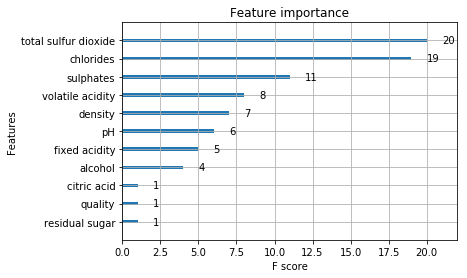

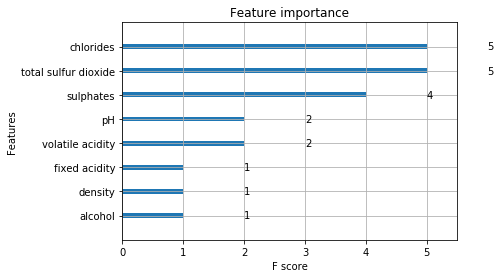

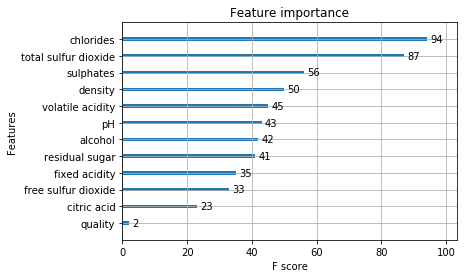

In [66]:
# Get feature importances from all 3 models

model_gs.feature_importances_
model_rs.feature_importances_
model_bo.feature_importances_
plot_importance(model_gs)
plot_importance(model_rs)
plot_importance(model_bo)

In [67]:
# Confusion matrix for all the models


f"Confusion_matrix for Grid Search: {confusion_matrix(y_test,y_pred_gs)}"

'Confusion_matrix for Grid Search: [[ 529   16]\n [  20 1698]]'

In [68]:
f"Confusion_matrix for Random Search: {confusion_matrix(y_test,y_pred_rs)}"

'Confusion_matrix for Random Search: [[ 513   32]\n [  15 1703]]'

In [69]:
f"Confusion_matrix for Bayes Opt: {confusion_matrix(y_test,y_pred_bo)}"

'Confusion_matrix for Bayes Opt: [[ 536    9]\n [   8 1710]]'

In [70]:
# Get probability of occurrence of each class
y_pred_prob_gs = model_gs.predict_proba(X_test)
y_pred_prob_rs = model_rs.predict_proba(X_test)
y_pred_prob_bo = model_bo.predict_proba(X_test)

In [71]:
# Draw ROC curve
fpr_gs, tpr_gs, thresholds = roc_curve(y_test,
                                 y_pred_prob_gs[: , 0],
                                 pos_label= 0
                                 )

fpr_rs, tpr_rs, thresholds = roc_curve(y_test,
                                 y_pred_prob_rs[: , 0],
                                 pos_label= 0
                                 )

fpr_bo, tpr_bo, thresholds = roc_curve(y_test,
                                 y_pred_prob_bo[: , 0],
                                 pos_label= 0
                                 )

In [72]:
# AUC
auc_gs = auc(fpr_gs,tpr_gs)
auc_rs = auc(fpr_rs,tpr_rs)
auc_bo = auc(fpr_bo,tpr_bo)

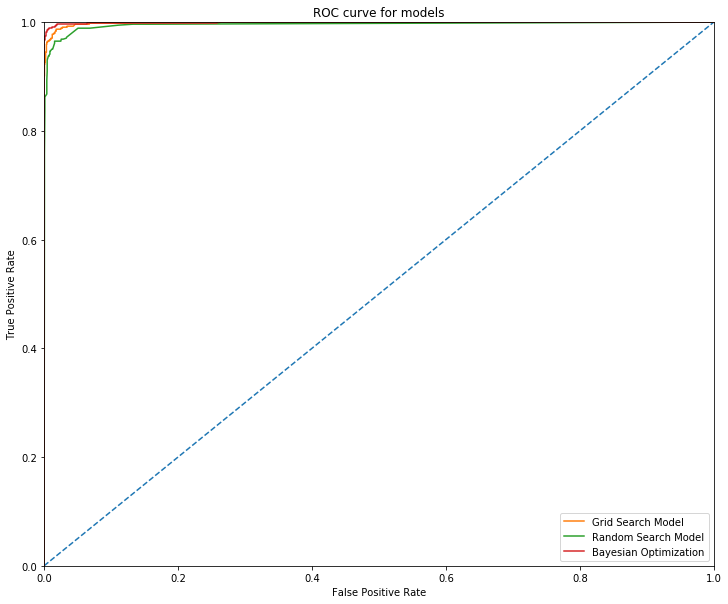

In [73]:
######## Plotting the ROC curves

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")

# Labels 
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

# Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Plot each graph now
ax.plot(fpr_gs, tpr_gs, label = "Grid Search Model")
ax.plot(fpr_rs, tpr_rs, label = "Random Search Model")
ax.plot(fpr_bo, tpr_bo, label = "Bayesian Optimization")


# Set legend and show plot
ax.legend(loc="lower right")

In [74]:
### Grid Search Perfromance Indicators
f"Grid Search: Accuracy = {accuracy_score(y_test,y_pred_gs)}, Precison = {precision_score(y_test,y_pred_gs)}, Recall = {recall_score(y_test,y_pred_gs)}, f1_score = {f1_score(y_test,y_pred_gs)}, AUC = {auc_gs}"

'Grid Search: Accuracy = 0.9840919133893062, Precison = 0.9906651108518086, Recall = 0.9883585564610011, f1_score = 0.9895104895104896, AUC = 0.9986441456355267'

In [75]:
### Random Search Perfromance Indicators
f"Random Search: Accuracy = {accuracy_score(y_test,y_pred_rs)}, Precison = {precision_score(y_test,y_pred_rs)}, Recall = {recall_score(y_test,y_pred_rs)}, f1_score = {f1_score(y_test,y_pred_rs)}, AUC = {auc_rs}"

'Random Search: Accuracy = 0.9792311091471498, Precison = 0.9815561959654179, Recall = 0.9912689173457508, f1_score = 0.9863886475528526, AUC = 0.9953209941151969'

In [76]:
### Bayesian Optimization Perfromance Indicators
f"Bayesian Opt: Accuracy = {accuracy_score(y_test,y_pred_bo)}, Precison = {precision_score(y_test,y_pred_bo)}, Recall = {recall_score(y_test,y_pred_bo)}, f1_score = {f1_score(y_test,y_pred_bo)}, AUC = {auc_bo}"

'Bayesian Opt: Accuracy = 0.9924878479893946, Precison = 0.9947643979057592, Recall = 0.9953434225844005, f1_score = 0.9950538260110562, AUC = 0.9992117995108457'